# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from google.colab import files
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import io

# Upload File

In [2]:
uploaded = files.upload()

Saving dataset.xlsx to dataset.xlsx


In [3]:
df = pd.read_excel(io.BytesIO(uploaded['dataset.xlsx']))

In [4]:
df.head()

,NO,NAMA USAHA,KAB KOTA,STATUS USAHA,JENIS LAPANGAN USAHA,NPWP USAHA,JUMLAH TENAGA KERJA,OMSET RATA,BIAYA PRODUKSI RATA,JENIS KESULITAN USAHA,DAPAT KREDIT,PERLU PINJAMAN PIHAK LUAR
0,1,KOPONTREN NURUL YASIN/AWET MADURA FOOD,[26] BANGKALAN,KOPERASI,[C] INDUSTRI PENGOLAHAN,0,15,3000000,1565000,PERMODALAN,TIDAK,YA
1,2,KACANG MENTE,[26] BANGKALAN,KOPERASI,[C] INDUSTRI PENGOLAHAN,0,4,500000,200000,PERMODALAN,TIDAK,YA
2,3,BANGUN GUNA SEJAHTERA (BAGUS),[26] BANGKALAN,KOPERASI,[G] PERDAGANGAN BESAR & ECERAN; REPARASI MOBIL...,0,9,3000000,2500000,PERMODALAN,TIDAK,YA
3,4,TOKO KEPANK,[26] BANGKALAN,KOPERASI,[G] PERDAGANGAN BESAR & ECERAN; REPARASI MOBIL...,961793726644000,16,6000000,7000000,TIDAK,TIDAK,TIDAK
4,5,KOPERASI PONDOK PESANTREN NURUL AMANAH,[26] BANGKALAN,KOPERASI,[G] PERDAGANGAN BESAR & ECERAN; REPARASI MOBIL...,952028512644000,20,3800000,5500000,PEMASARAN,TIDAK,YA


# Normalisasi Data

In [5]:
if uploaded:
    dfs = [pd.read_excel(uploaded_file) for uploaded_file in uploaded.values()]
    if dfs:
        df = pd.concat(dfs, ignore_index=True)
        for uploaded_file in uploaded:
            print("filename:", uploaded_file)
    else:
        print("No valid DataFrames.")
else:
    print("No files uploaded.")

filename: dataset.xlsx


In [6]:
print("Data Asli :")
print(df)

Data Asli :
      NO                              NAMA USAHA        KAB KOTA  \
0      1  KOPONTREN NURUL YASIN/AWET MADURA FOOD  [26] BANGKALAN   
1      2                            KACANG MENTE  [26] BANGKALAN   
2      3           BANGUN GUNA SEJAHTERA (BAGUS)  [26] BANGKALAN   
3      4                             TOKO KEPANK  [26] BANGKALAN   
4      5  KOPERASI PONDOK PESANTREN NURUL AMANAH  [26] BANGKALAN   
..   ...                                     ...             ...   
195  196                              IKA MAKMUR  [26] BANGKALAN   
196  197                         INDAH ALUMINIUM  [26] BANGKALAN   
197  198                             INDAH MOTOR  [26] BANGKALAN   
198  199                         INDRA JAYA CELL  [26] BANGKALAN   
199  200                             JAMU ZAINAB  [26] BANGKALAN   

     STATUS USAHA                               JENIS LAPANGAN USAHA  \
0        KOPERASI                            [C] INDUSTRI PENGOLAHAN   
1        KOPERASI          

In [7]:
print("Kolom Yang Terdapat Pada Data :")
print(df.columns)

Kolom Yang Terdapat Pada Data :
Index(['NO', 'NAMA USAHA', 'KAB KOTA', 'STATUS USAHA', 'JENIS LAPANGAN USAHA',
       'NPWP USAHA', 'JUMLAH TENAGA KERJA', 'OMSET RATA',
       'BIAYA PRODUKSI RATA', 'JENIS KESULITAN USAHA', 'DAPAT KREDIT',
       'PERLU PINJAMAN PIHAK LUAR'],
      dtype='object')


In [8]:
print("Type data dalam dataset")
print(df.dtypes)

Type data dalam dataset
NO                            int64
NAMA USAHA                   object
KAB KOTA                     object
STATUS USAHA                 object
JENIS LAPANGAN USAHA         object
NPWP USAHA                    int64
JUMLAH TENAGA KERJA           int64
OMSET RATA                    int64
BIAYA PRODUKSI RATA           int64
JENIS KESULITAN USAHA        object
DAPAT KREDIT                 object
PERLU PINJAMAN PIHAK LUAR    object
dtype: object


In [9]:
columns_to_drop = ["NO", "NAMA USAHA"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
if 'KAB KOTA' in df.columns:
    label_encoder = LabelEncoder()
    df['KAB KOTA'] = label_encoder.fit_transform(df['KAB KOTA'])

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])

In [10]:
if len(df) > 0:
    scaler = MinMaxScaler()
    daftar_col = df.columns
    df[daftar_col] = scaler.fit_transform(df[daftar_col])
    df.to_csv('normalized_data.csv', index=False ,encoding='utf-8')
    print("Normalized data has been saved to 'normalized_data.csv'.")
    print("Hasil Normalisasi Data Menggunakan Min-Max Scaling :")
    print(df)
else:
    print("DataFrame is empty.")

Normalized data has been saved to 'normalized_data.csv'.
Hasil Normalisasi Data Menggunakan Min-Max Scaling :
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315            

# K - Means

In [11]:
df = pd.read_csv('normalized_data.csv')

In [12]:
df.head()

,KAB KOTA,STATUS USAHA,JENIS LAPANGAN USAHA,NPWP USAHA,JUMLAH TENAGA KERJA,OMSET RATA,BIAYA PRODUKSI RATA,JENIS KESULITAN USAHA,DAPAT KREDIT,PERLU PINJAMAN PIHAK LUAR
0,0.0,0.4,0.125,0.000000,0.43750,0.034315,0.058584,0.833333,0.0,1.0
1,0.0,0.4,0.125,0.000000,0.09375,0.000000,0.000000,0.833333,0.0,1.0
2,0.0,0.4,0.500,0.000000,0.25000,0.034315,0.098712,0.833333,0.0,1.0
3,0.0,0.4,0.500,0.992705,0.46875,0.075493,0.291845,1.000000,0.0,0.0
4,0.0,0.4,0.500,0.982626,0.59375,0.045296,0.227468,0.500000,0.0,1.0


Menentukan Jumlah Klaster

In [13]:
k_value = int(input("Select the number of clusters (K): "))

Select the number of clusters (K): 4


In [14]:
minmax = MinMaxScaler().fit_transform(df[['OMSET RATA', 'BIAYA PRODUKSI RATA', 'JUMLAH TENAGA KERJA']])

In [15]:
kmeans_iter1 = KMeans(n_clusters=k_value, random_state=123)
kmeans_iter1.fit(minmax)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=123)

In [16]:
centers_previous = kmeans_iter1.cluster_centers_

In [17]:
distances_previous = np.linalg.norm(minmax - centers_previous[kmeans_iter1.labels_], axis=1)
print("Hasil Klastering Pada Iteration 1:")
labels_iteration1 = kmeans_iter1.labels_ + 1
clustered_data_iter1 = pd.concat([df, pd.DataFrame({'Cluster': labels_iteration1})], axis=1)
print(clustered_data_iter1)

Hasil Klastering Pada Iteration 1:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2

In [18]:
silhouette_scores_per_iteration = []
sse_per_iteration = []

*Proses Iterasi kedua hingga selanjutnya*

In [19]:
iteration = 2
distances_current = distances_previous

In [20]:
while True:
  kmeans = KMeans(n_clusters=k_value, init='random', random_state=iteration * 123)
  kmeans.fit(minmax)
  centers_current = kmeans.cluster_centers_
  distances_current_new = np.linalg.norm(minmax - centers_previous[kmeans.labels_], axis=1)
  sse_cluster = np.sum((minmax - centers_previous[kmeans.labels_]) ** 2, axis=1)
  sse_per_iteration.append(np.sum(sse_cluster))
  silhouette_avg = silhouette_score(minmax, kmeans.labels_)
  silhouette_scores_per_iteration.append(silhouette_avg)
  if np.array_equal(distances_current, distances_current_new):
      print(f" Pada iterasi ke - {iteration} - Sudah tidak ada perubahan perhitungan jarak.")
      break
  distances_current = distances_current_new
  centers_previous = centers_current.copy()
  iteration += 1
  print(f"Jumlah Iterasi: {iteration}")
  labels = kmeans.labels_
  labels_shifted = labels + 1
  # Menampilkan hasil klastering pada iterasi terakhir
  print("Hasil Klastering pada Iterasi Terakhir:")
  df['Cluster'] = labels_shifted
  print(df)
else:
  print("Data Frame tidak ada")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 3
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8


Jumlah Iterasi: 16
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 23
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 35
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 55
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 61
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 69
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 71
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 75
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 79
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 86
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 94
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 102
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 106
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 113
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 119
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 123
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 125
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 131
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 137
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 140
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 141
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 143
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 145
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 147
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 149
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 151
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 154
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 156
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 158
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 160
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 163
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 165
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 167
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 170
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 172
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 174
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 175
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 176
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 178
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 183
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 188
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 204
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 208
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 214
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 225
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 232
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 244
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 260
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 270
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 273
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 281
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 286
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8


Jumlah Iterasi: 306
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 312
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 318
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 325
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 334
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 338
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 345
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 348
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Jumlah Iterasi: 352
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 354
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 361
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 364
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 368
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 371
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 386
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 387
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 392
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 395
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 397
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 404
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 405
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 411
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 414
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 416
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 418
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 421
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 424
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 427
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 428
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 429
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 434
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 442
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 444
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 447
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 451
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 453
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Jumlah Iterasi: 456
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 458
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 465
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 472
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 478
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.03431

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 494
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 501
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 506
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 508
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 512
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 518
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 524
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8


Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.00000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 537
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 544
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 550
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 562
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 570
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 572
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8


Jumlah Iterasi: 580
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 585
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 587
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 593
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 600
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 604
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 623
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 628
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 630
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 634
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 638
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 645
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 648
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 654
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 657
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 661
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 665
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 667
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.00000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 670
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 676
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 679
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 682
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 685
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 687
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 689
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Jumlah Iterasi: 694
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 697
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 702
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 703
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 704
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 712
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 715
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 717
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 719
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 721
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 723
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 726
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8


Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.00000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 735
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 740
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 743
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000             0.000000   
2                0.25000    0.034315

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 763
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 768
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 771
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Iterasi: 773
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 780
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 786
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Iterasi: 791
Hasil Klastering pada Iterasi Terakhir:
     KAB KOTA  STATUS USAHA  JENIS LAPANGAN USAHA  NPWP USAHA  \
0         0.0           0.4                 0.125    0.000000   
1         0.0           0.4                 0.125    0.000000   
2         0.0           0.4                 0.500    0.000000   
3         0.0           0.4                 0.500    0.992705   
4         0.0           0.4                 0.500    0.982626   
..        ...           ...                   ...         ...   
195       0.0           0.8                 0.000    0.000000   
196       0.0           0.0                 0.125    0.000000   
197       0.0           0.2                 0.500    0.000000   
198       0.0           0.6                 1.000    0.000000   
199       0.0           0.6                 0.750    0.000000   

     JUMLAH TENAGA KERJA  OMSET RATA  BIAYA PRODUKSI RATA  \
0                0.43750    0.034315             0.058584   
1                0.09375    0.000000 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
df.head(10)

,KAB KOTA,STATUS USAHA,JENIS LAPANGAN USAHA,NPWP USAHA,JUMLAH TENAGA KERJA,OMSET RATA,BIAYA PRODUKSI RATA,JENIS KESULITAN USAHA,DAPAT KREDIT,PERLU PINJAMAN PIHAK LUAR,Cluster
0,0.0,0.4,0.125,0.000000,0.43750,0.034315,0.058584,0.833333,0.0,1.0,4
1,0.0,0.4,0.125,0.000000,0.09375,0.000000,0.000000,0.833333,0.0,1.0,2
2,0.0,0.4,0.500,0.000000,0.25000,0.034315,0.098712,0.833333,0.0,1.0,2
3,0.0,0.4,0.500,0.992705,0.46875,0.075493,0.291845,1.000000,0.0,0.0,4
4,0.0,0.4,0.500,0.982626,0.59375,0.045296,0.227468,0.500000,0.0,1.0,4
5,0.0,0.4,0.875,0.000000,0.25000,0.006863,0.012876,0.833333,0.0,1.0,2
6,0.0,0.4,0.375,0.983981,0.68750,0.013726,0.017167,0.833333,0.0,0.0,4
7,0.0,0.4,0.000,1.000000,0.12500,0.096083,0.120172,1.000000,0.0,1.0,2
8,0.0,0.0,0.500,0.683700,0.59375,0.679441,0.849785,0.000000,1.0,1.0,1
9,0.0,0.6,0.125,0.000000,0.25000,0.041178,0.086052,0.833333,0.0,1.0,2


In [22]:
for klaster_id in df['Cluster'].unique():
  klaster_df = df[df['Cluster'] == klaster_id]

In [23]:
klaster_1_df = df[df['Cluster'] == 1]
print("\nDataFrame untuk Klaster 1:")
klaster_1_df.head()


DataFrame untuk Klaster 1:


,KAB KOTA,STATUS USAHA,JENIS LAPANGAN USAHA,NPWP USAHA,JUMLAH TENAGA KERJA,OMSET RATA,BIAYA PRODUKSI RATA,JENIS KESULITAN USAHA,DAPAT KREDIT,PERLU PINJAMAN PIHAK LUAR,Cluster
8,0.0,0.0,0.500,0.683700,0.59375,0.679441,0.849785,0.0,1.0,1.0,1
12,0.0,0.0,0.125,0.152156,0.65625,0.679441,0.635193,1.0,0.0,0.0,1
89,0.0,0.8,0.625,0.000000,0.62500,0.775524,0.593991,1.0,0.0,0.0,1
100,0.0,0.6,1.000,0.000000,0.12500,0.953963,1.000000,1.0,0.0,0.0,1
101,0.0,0.6,1.000,0.000000,0.12500,0.734345,0.901288,1.0,0.0,0.0,1


In [24]:
klaster_2_df = df[df['Cluster'] == 2]
print("\nDataFrame untuk Klaster 2:")
klaster_2_df.head()


DataFrame untuk Klaster 2:


,KAB KOTA,STATUS USAHA,JENIS LAPANGAN USAHA,NPWP USAHA,JUMLAH TENAGA KERJA,OMSET RATA,BIAYA PRODUKSI RATA,JENIS KESULITAN USAHA,DAPAT KREDIT,PERLU PINJAMAN PIHAK LUAR,Cluster
1,0.0,0.4,0.125,0.0,0.09375,0.000000,0.000000,0.833333,0.0,1.0,2
2,0.0,0.4,0.500,0.0,0.25000,0.034315,0.098712,0.833333,0.0,1.0,2
5,0.0,0.4,0.875,0.0,0.25000,0.006863,0.012876,0.833333,0.0,1.0,2
7,0.0,0.4,0.000,1.0,0.12500,0.096083,0.120172,1.000000,0.0,1.0,2
9,0.0,0.6,0.125,0.0,0.25000,0.041178,0.086052,0.833333,0.0,1.0,2


In [25]:
klaster_3_df = df[df['Cluster'] == 3]
print("\nDataFrame untuk Klaster 3:")
klaster_3_df.head()


DataFrame untuk Klaster 3:


,KAB KOTA,STATUS USAHA,JENIS LAPANGAN USAHA,NPWP USAHA,JUMLAH TENAGA KERJA,OMSET RATA,BIAYA PRODUKSI RATA,JENIS KESULITAN USAHA,DAPAT KREDIT,PERLU PINJAMAN PIHAK LUAR,Cluster
16,0.0,0.8,0.125,0.0,0.28125,0.226480,0.506438,0.333333,0.0,0.0,3
32,0.0,0.2,0.750,0.0,0.25000,0.404919,0.120172,0.000000,0.0,0.0,3
49,0.0,0.8,1.000,0.0,0.09375,0.487276,0.197425,0.833333,0.0,0.0,3
51,0.0,0.2,1.000,0.0,0.06250,0.240206,0.527897,1.000000,1.0,0.0,3
53,0.0,0.2,0.500,0.0,0.18750,0.239520,0.635193,1.000000,1.0,0.0,3


In [26]:
klaster_4_df = df[df['Cluster'] == 4]
print("\nDataFrame untuk Klaster 4:")
klaster_4_df.head()


DataFrame untuk Klaster 4:


,KAB KOTA,STATUS USAHA,JENIS LAPANGAN USAHA,NPWP USAHA,JUMLAH TENAGA KERJA,OMSET RATA,BIAYA PRODUKSI RATA,JENIS KESULITAN USAHA,DAPAT KREDIT,PERLU PINJAMAN PIHAK LUAR,Cluster
0,0.0,0.4,0.125,0.000000,0.43750,0.034315,0.058584,0.833333,0.0,1.0,4
3,0.0,0.4,0.500,0.992705,0.46875,0.075493,0.291845,1.000000,0.0,0.0,4
4,0.0,0.4,0.500,0.982626,0.59375,0.045296,0.227468,0.500000,0.0,1.0,4
6,0.0,0.4,0.375,0.983981,0.68750,0.013726,0.017167,0.833333,0.0,0.0,4
10,0.0,0.4,0.500,0.000000,1.00000,0.102946,0.244635,0.833333,1.0,1.0,4


*Sum Square Eror Dari Tiap Klaster*

In [27]:
print("Nilai SSE Klaster Berdasarkan Iterasi Terakhir")
sse_values = []
for cluster in range(k_value):
  sse_cluster = np.sum(sse_per_iteration[cluster::k_value])
  print(f"Klaster {cluster + 1}: {sse_cluster}")
  sse_values.append(sse_cluster)

Nilai SSE Klaster Berdasarkan Iterasi Terakhir
Klaster 1: 10399.985312200617
Klaster 2: 10271.60406855587
Klaster 3: 10542.204685937882
Klaster 4: 10356.239448206059


In [28]:
avg_sse = np.mean(sse_cluster)
print(f"Rata-rata SSE: {avg_sse}")

Rata-rata SSE: 10356.239448206059


*Silhouette Coefficient*

In [29]:
avg_silhouette = np.mean(silhouette_scores_per_iteration)
print(f"Rata-rata Silhouette : {avg_silhouette}")

Rata-rata Silhouette : 0.3708143179152228


**GRAFIK UNTUK MENAMPILKAN KLASTER TERBAIK MENGGUNAKAN ELBOW**


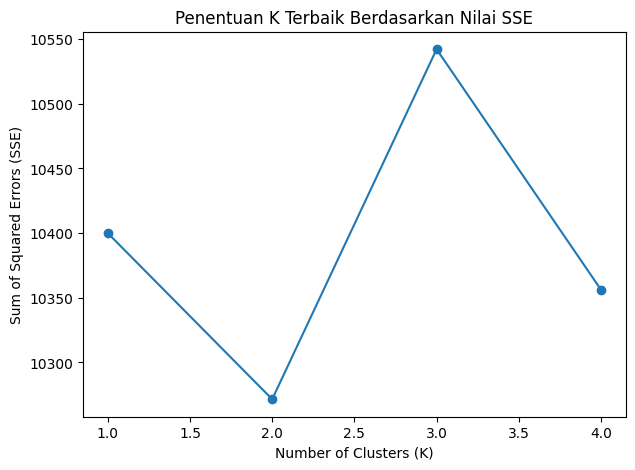

In [30]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, k_value + 1), sse_values, marker='o')
plt.title('Penentuan K Terbaik Berdasarkan Nilai SSE')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()